# <center> Домашнее задание 4 </center>

## 1. Матрица Тёплица (30 баллов)

1. Напишите функцию, которая на вход принимает вектор уникальных значений {$a_{n-1},  \dots, a_{0}, \dots, a_{-(n+1)}$} и размер матрицы, а выдает сгенерированную на основании этих значений [матрицу Тёплица](https://en.wikipedia.org/wiki/Toeplitz_matrix). В решении нельзя использовать готовые реализации из ```scipy.linalg``` или других библиотек, но необходимо использовать ```numpy```. 
2. Напишите функцию, которая принимает на вход матрицу размера $N \times N$ и проверяет, является ли она матрицей Тёплица. Функция должна вернуть в ответе булевое значение (```True``` или ```False```). 

In [ ]:
# ПУНКТ 1
def TeplMatrix(a):
    n = len(a)
    m = (n - 1) // 2
    uptriag = a[:m:-1]
    downtriag = a[:m]
    mid = a[(n + 1) // 2 - 1]
    matrix = np.zeros(((n - m), (n - m)))
    np.fill_diagonal(matrix, mid)
    for i in range(m):
        np.fill_diagonal(matrix[-i - 1::], downtriag[i])
    matrix = matrix.transpose()
    for i in range(m):
        np.fill_diagonal(matrix[-i - 1::], uptriag[i])
    return matrix.transpose()

In [ ]:
# ПУНКТ 2
def IsTeplMatrix(a):
    diags = [a[::1].diagonal(i) for i in range(-a.shape[0]+1, a.shape[1])]
    diags.extend(a.diagonal(i) for i in range(a.shape[1]-1, -a.shape[0], 1))
    for i in range(len(diags)):
        if len(np.unique(diags[i])) > 1:
            return False
    return True

## 2. Ищем лучшую однушку на ЦИАНе (35 баллов)

В этом задании будем скачивать объявления о продаже однокомнатных квартир в Москве c [ЦИАНа](https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p=1&region=1&room1=1) и выберем самую понравившуюся из них! :3

1. Напишите функцию, которая парсит все объявления с одной страницы и по каждому из них сохраняет ссылку (href) на объявление с более подробной информацией. Примените эту функцию для первых 10 страниц, сохранив все href в одном списке. Если хотите собрать полную информацию и не боитесь быть забаненными, можете скачать все 54 страницы.

2. Напишите функцию, которая для каждой (href) страницы с объявлением квартиры качает и сохраняет: 
* **Общую стоимость**
* **Адрес**
* **Ближайшее метро**
* **Тип жилья**
* **Площадь комнат**
* **Этаж**
* **Срок сдачи**

Сохраните эту информацию в DataFrame.

3. Избавьтесь от лишних символов в колонках с ценой квартиры, этажом и площадью комнат, приведя их к числову типу. Определите пороги по этим переменным, ниже или выше которых вы будете считать это жилье неподходящим. Например, цена не более 15 миллионов, этаж не ниже 2, общая площадь не менее 40 $м^2$. Можете выбрать другие наиболее важные для вас критерии, всего их должно быть не меньше 3. 
Отфильтруйте DataFrame, оставив только те объявления, которые удовлетворяют условиям. Отсортируйте оставшиеся объявления по возрастанию цены и отобразить топ-10 финальных кандидатов. Понравилась какая-нибудь квартира из них? :) 

In [28]:
#ПУНКТ 1 - собрать href с 10 страниц
import requests      
import numpy as np   
import pandas as pd  
import time          
import requests# зайдем в библиотеку за книжками. Ой, то есть импортируем библиотеки
from fake_useragent import UserAgent
UserAgent().google # обманем ЦИАН
from bs4 import BeautifulSoup #приготовим кастрюли и половник
def getdatlinks(howmanypages):
    hreflist=[]
    for i in range(1, howmanypages+1):
        url = 'https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p='+str(i)+'&region=1&room1=1'
        response = requests.get(url)
        html = response.content
        realestate = BeautifulSoup(html,'html.parser') # вкинем в суп основные ингредиенты
        #'article', {'class' : 'product_pod'}
        flatlist = realestate.find_all('article',{'class':"_93444fe79c--container--2pFUD _93444fe79c--cont--1Ddh2"}) #теперь откроем рецепт
        numberofflats = len(list(flatlist))
        for i in range(0,numberofflats):
            hreflist.append(flatlist[i].find('a',{'class':'_93444fe79c--link--39cNw'}).get('href'))
    return(hreflist)
urllist = getdatlinks(50) #ЗАМАХНЕМСЯ НА ОГРОМНЫЙ ДАТАСЕТ
len(urllist)

1392

In [12]:
urllist

['https://www.cian.ru/sale/flat/246614632/',
 'https://www.cian.ru/sale/flat/246614666/',
 'https://www.cian.ru/sale/flat/243996432/',
 'https://www.cian.ru/sale/flat/237175519/',
 'https://www.cian.ru/sale/flat/243319419/',
 'https://www.cian.ru/sale/flat/237958300/',
 'https://www.cian.ru/sale/flat/240923042/',
 'https://www.cian.ru/sale/flat/241557364/',
 'https://www.cian.ru/sale/flat/244356603/',
 'https://www.cian.ru/sale/flat/246637828/',
 'https://www.cian.ru/sale/flat/229538283/',
 'https://www.cian.ru/sale/flat/244703533/',
 'https://www.cian.ru/sale/flat/233327181/',
 'https://www.cian.ru/sale/flat/242213434/',
 'https://www.cian.ru/sale/flat/243449717/',
 'https://www.cian.ru/sale/flat/245980803/',
 'https://www.cian.ru/sale/flat/243374735/',
 'https://www.cian.ru/sale/flat/238778847/',
 'https://www.cian.ru/sale/flat/238073308/',
 'https://www.cian.ru/sale/flat/243306819/',
 'https://www.cian.ru/sale/flat/244536544/',
 'https://www.cian.ru/sale/flat/234000831/',
 'https://

### Время веселья!
Парсим пока не забанили

In [29]:
# ПУНКТ2 - самое веселье
time_start=time.localtime() #для интересу
from tqdm import tqdm_notebook
import os
counter = 0 #не бейте за глобальные переменные, плиз
from IPython.display import clear_output #хочу очищать поле выдачи программы (консоль или терминал - хз как правильно)
def getdatinfo(url):
    try:
        response = requests.get(url)
        # responselist = []
        # responselist.append(str(response)) - эксперименты со строкой статуса
        #print(response,end='')
        html = response.content
        flat = BeautifulSoup(html,'html.parser') # вкинем в суп основные ингредиенты
        #'article', {'class' : 'product_pod'}
        #flatlist = realestate.find_all('article',{'class':"_93444fe79c--container--2pFUD _93444fe79c--cont--1Ddh2"}) #теперь откроем рецепт
        #number = 0
        #находим цену
        price = flat.find('span',{'class':'a10a3f92e9--price_value--1iPpd'}).text
        pricesum = int(price[:-1].replace('\xa0',''))
        #list(pricelist.append(int(pricesum)))
        #print(pricelist)
        # находим адрес
        #.find('a',{'class':})
        # строка адреса
        try:
            adressstring =  flat.find_all('address',{'class':'a10a3f92e9--address--140Ec'})
            adress = ''
            for i in list(adressstring):
                adress = adress + i.text+ ', '
                adress = adress[:-2]
        except:
            adress=''
        ## Находим метро
        try:
            metro =  list(flat.find('ul',{'class':'a10a3f92e9--undergrounds--2pop3'}).text)[0]
        except:
            metro = ''
        # Находим тип жилья
        try:
            estype = flat.find('span',{'class':'a10a3f92e9--value--3Ftu5'}).text
        except:
            estype=''
        # Находим площадь, этаж и дату
        afd = flat.find_all('div',{'class':'a10a3f92e9--info-value--18c8R'})
        strangething = len(list(afd))
        try:
            size = float(list(afd)[0].text[:-3].replace(',','.'))
        except:
            size = ''
        # находим этаж
        try:
            floor = int(list(afd)[strangething-2].text.split()[0])
        except:
            floor=''
        #floorlist.append(float(((floor.split())[0]).replace(',','.')))
        # находим срок сдачи
        try:
            readydate = list(afd)[-1].text
        except:
            readydate = ''
        info = [ ]
        info.append({'PRICE': pricesum,
                    'ADRESS': adress[:-8],
                     'METRO': metro,
                    'TYPE': estype,
                    'AREA': size,
                    'FLOOR': floor,
                    'DATE': readydate,
                    'LINK': url})
        #clear_output(wait=True)
        counter =+1
        #print('OK '+counter)
    
        return (info)
    except:
        info = [ ]
        info.append({'PRICE': 0,
                    'ADRESS': 0,
                     'METRO': 0,
                    'TYPE': 0,
                    'AREA': 0,
                    'FLOOR': 0,
                    'DATE': 0,
                    'LINK': url})
        #clear_output(wait=True)
        return (info)
        #print(counter+1, '- эта ссылка плохая')
def getallinfo (listoflinks):
    allinfo=[ ]
    for i in tqdm_notebook(listoflinks):
        
        allinfo.extend(getdatinfo(i))
    alldf = pd.DataFrame(allinfo)
    return alldf
alldf = getallinfo(urllist)
time_finish=time.localtime()
alldf = alldf[alldf['PRICE']>0]
alldf.shape

<ipython-input-29-c086c179cd87>:91: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(listoflinks):


(1392, 8)

In [32]:
alldf.head(10)

,PRICE,ADRESS,METRO,TYPE,AREA,FLOOR,DATE,LINK
0,65167200,"Москва, ЦАО, р-н Арбат, ул. Арбат, 24",А,Новостройка,75.60,6,1 кв. 2014,https://www.cian.ru/sale/flat/246614632/
1,55335000,"Москва, ЦАО, р-н Арбат, ул. Арбат, 39",С,Новостройка,65.10,2,4 кв. 2018,https://www.cian.ru/sale/flat/246614666/
2,12890734,"Москва, СЗАО, р-н Хорошево-Мневники, Причальны...",Ш,Новостройка,35.20,15,4 кв. 2023,https://www.cian.ru/sale/flat/244750187/
3,17617426,"Москва, ЗАО, р-н Раменки, ул. Лобачевского, 120",А,Новостройка,59.17,29,1 кв. 2021,https://www.cian.ru/sale/flat/241020123/
4,61080000,"Москва, ЦАО, р-н Мещанский, пер. Печатников, 19С1",Т,Вторичка,101.80,5,2009,https://www.cian.ru/sale/flat/244703533/
5,13315330,"Москва, СЗАО, р-н Покровское-Стрешнево, Волоко...",Т,Новостройка Апартаменты,50.10,22,1 кв. 2022,https://www.cian.ru/sale/flat/246637828/
6,22740957,"Москва, ЦАО, р-н Басманный, Бакунинская ул., 5",Б,Новостройка Апартаменты,66.20,4,4 кв. 2020,https://www.cian.ru/sale/flat/240748079/
7,8300000,"Москва, ЗАО, р-н Можайский, Сколковское ш., 30",С,Вторичка,38.20,14,2007,https://www.cian.ru/sale/flat/242213434/
8,9671702,"Москва, СВАО, р-н Ярославский, ул. Красная Сосна",В,Новостройка,41.40,2,3 кв. 2021,https://www.cian.ru/sale/flat/238073308/
9,7060628,"Москва, ЮВАО, р-н Некрасовка, ул. Вертолетчико...",Н,Вторичка,35.60,,8 из 17,https://www.cian.ru/sale/flat/243306819/


### Мои параметры для поиска квартиры:
- цена меньше 8 миллионов
- метраж больше 40 квадратов
- Новостройка

In [49]:
mydf = pd.DataFrame
mydf = alldf[(alldf['PRICE']<=8000000) & (alldf['AREA']>=40) & (alldf['TYPE']=='Новостройка') ]
mydf.sort_values(by='PRICE').head(10)

,PRICE,ADRESS,METRO,TYPE,AREA,FLOOR,DATE,LINK
573,6149000,"Москва, НАО (Новомосковский), Десеновское посе...",О,Новостройка,45.00,12,9 из 9,https://www.cian.ru/sale/flat/245485214/
597,6300000,"Москва, НАО (Новомосковский), Сосенское поселе...",У,Новостройка,47.55,1,4 кв. 2020,https://www.cian.ru/sale/flat/243136765/
558,6500000,"Москва, ЮАО, р-н Бирюлево Восточное, 6-я Радиа...",Ц,Новостройка,48.71,,2 из 22,https://www.cian.ru/sale/flat/243577551/
634,6600000,"Москва, ЮАО, р-н Бирюлево Восточное, 6-я Радиа...",Ц,Новостройка,42.12,,18 из 18,https://www.cian.ru/sale/flat/246732246/
596,6700000,"Москва, ЮАО, р-н Бирюлево Восточное, 6-я Радиа...",Ц,Новостройка,42.12,,7 из 18,https://www.cian.ru/sale/flat/244864870/
645,6950000,"Москва, НАО (Новомосковский), Коммунарка посел...",К,Новостройка,41.10,6,2 кв. 2022,https://www.cian.ru/sale/flat/243371868/
646,6990000,"Москва, НАО (Новомосковский), Воскресенское по...",Б,Новостройка,42.00,15,16 из 17,https://www.cian.ru/sale/flat/243147402/
655,7011120,"Москва, НАО (Новомосковский), Коммунарка посел...",Б,Новостройка,44.60,1,4 кв. 2021,https://www.cian.ru/sale/flat/239564725/
661,7144477,"Москва, ЮВАО, р-н Некрасовка, Люберецкие Поля ...",Н,Новостройка,43.00,8,3 кв. 2023,https://www.cian.ru/sale/flat/245614654/
663,7148680,"Москва, НАО (Новомосковский), Коммунарка посел...",Б,Новостройка,42.20,11,2 кв. 2022,https://www.cian.ru/sale/flat/245468854/


### Троицкий и Новомосковский округа Москвы меня не отпускают. Что ж, займём но въедем!


## 3. Дефолты (35 баллов)

Судя по стоимости недвижимости в Москве, придется влезть в долги... Проанализируем, как часто люди не отдают ипотеки и кредиты! 

В файле ```defaults.csv``` предоставлены данные, которые можно использовать для анализа клиентской базы, предсказания дефолта, кредитного скоринга (т.е. для оценки кредитных рисков клиентов). 

Переменные:
* **ID** - идентификатор клиента;
* **LIMIT_BAL** - сумма предоставленного кредита/ипотеки (в долларах);
* **SEX** - пол (1=мужской, 2=женский);
* **EDUCATION** - уровень образования (1=научная степень, 2=высшее, 3=среднее, 4=другое, 5 и 6=неизвестно);
* **MARRIAGE** - семейное положение (1=женат/замужем, 2=холост/незамужняя, 3=другое);
* **AGE** - возраст (в годах);
* **PAY_0** - Статус погашения кредита в сентябре (-1 = надлежащая оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца, ... 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более). **PAY_2, PAY_3, ..., PAY_6** - в августе, июле, июне, мае и апреле соответственно;
* **BILL_AMT1** - Сумма выписки по счету в сентябре (в долларах). **BILL_AMT2, BILL_AMT3, ..., BILL_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **PAY_AMT1** - Сумма предыдущего платежа в сентябре (в долларах). **PAY_AMT1, PAY_AMT2, ..., PAY_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **default.payment.next.month**: произошел дефолт (1=да, 0=нет).

Нужно проанализировать набор данных банка, выполнив следующие задания:
1. Загрузить данные и преобразуйте в pd.DataFrame. Какого размера этот датасет? Посмотрите на первые 10 строк ваших данных. С помощью ```random.randint()``` в диапазоне значений индексов строк сгенерируйте случайное число $N$ и верните строки из датафрейма по индексам от $N$ до $N + 20$.<br>
2. Отобразите количество пропущенных значений во всех колонках.  <br>
3. Выведите количество уникальных клиентов в датасете, покажите не менее 2 разных способов это сделать. <br>
4. Проверьте, есть ли среди клиентов дисбаланс в количестве женщин и мужчин? Какого их соотношение (в процентах)? <br>
5. Создайте новую переменную **AGE_BINS** с категориями по переменной возраст (= возрастными диапазонами). Постройте и сравните графики распределения клиентов по значениям переменных *AGE* и *AGE_BINS*. Клиенты каких возрастов чаще всего приходят за кредитом в этот банк? Есть ли преимущество использования переменной c категориям? <br>
6. Выведите общее количество клиентов с дефолтом и без него. Постройте гистограмму с процентным отношением этих групп. Как можно оценить, велика ли полученная доля клиентов с дефолтом? <br>
7. Постройте гистограмму и график плотности распределения по суммам предоставленных кредитов (*LIMIT_BAL*) для каждой из групп клиентов отдельно (с дефолтом и без), поместив их на один график. Сделайте размер графика побольше, поменяйте дефолтные цвета. 
8. На основе графика из предыдущего пункта, ответьте на вопросы:
* По кредитам какого размера чаще всего происходят дефолты?
* На основе графиков плотности распределения, начиная от какой суммы кредита клиентов без дефолта становится больше, чем клиентов с дефолтом? 
* Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта. <br>
9. Постройте матрицу корреляций для всех переменных по статусу погашения кредита. Добавьте значения корреляций на график. Есть ли общий тренд по возрастанию/убыванию корреляции по времени (всем месяцам)? <br>
10. Напишите функцию, которая возвращает словарь, где ключ - это сумма одобренного кредита, а значение - это вложенный словарь. В нем по ключу ```ratio``` хранится отношение клиентов с дефолтом к тем, у кого его не было, с такой суммой кредитов, а по ключу ```num_clients```  - общее число клиентов с таким кредитом. Пример элемента словаря: ``` {50000.0 : {'ratio': 0.357, 'num_clients': 3365}```. Отсортируйте получившийся словарь по ключу ```ratio``` в убывающем порядке. У какого размера кредита наибольшая доля клиентов с дефолтом? А сколько в датасете клиентов, по которым посчитана эта доля? Можем ли мы сделать вывод, что в целом не стоит одобрять эту сумму для кредита новым клиентам? <br>

Важно! Каждый график должен содержать как минимум заголовок и подписанные оси. 

In [1]:
## ПУНКТ 1
import pandas as pd # воспользуемся стандартным набором библиотек из заданий
import numpy as np
import pickle
import random

# Модули для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns


%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/bns/Downloads/dap_2020_fall_hw4-nsbityutskiy-main/data/defaults.csv')
type(df)
print(df.shape)
df.head(11)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [3]:
n = random.randint(0,30000-20)
dfn = df.iloc[n:(n+20)]
dfn

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
18190,18191,20000.0,1,1,1,36,0,0,0,2,...,28806.0,14463.0,18668.0,1700.0,4000.0,300.0,10000.0,5000.0,1000.0,0
18191,18192,50000.0,1,3,1,45,0,0,0,0,...,46501.0,47119.0,47321.0,2015.0,2063.0,2054.0,1672.0,1946.0,1700.0,0
18192,18193,70000.0,1,2,2,39,2,2,2,2,...,38512.0,37596.0,39877.0,3350.0,2000.0,2000.0,0.0,3055.0,1700.0,1
18193,18194,70000.0,1,2,1,45,2,0,0,0,...,70032.0,50973.0,48529.0,3100.0,3000.0,3100.0,2000.0,1800.0,1700.0,0
18194,18195,450000.0,1,3,2,38,0,0,0,0,...,281667.0,289459.0,262269.0,15000.0,11000.0,10013.0,20000.0,30000.0,30000.0,0
18195,18196,70000.0,1,2,1,40,0,0,0,0,...,8582.0,9038.0,9490.0,1113.0,1132.0,1200.0,600.0,600.0,600.0,0
18196,18197,120000.0,1,2,2,45,0,0,0,0,...,119191.0,116549.0,119507.0,6000.0,5800.0,6000.0,4400.0,5000.0,4800.0,0
18197,18198,80000.0,1,2,2,33,-1,-1,-1,-1,...,396.0,3832.0,3867.0,23185.0,31610.0,396.0,3832.0,3867.0,1500.0,0
18198,18199,20000.0,1,2,2,40,1,2,2,2,...,11987.0,11503.0,11175.0,1923.0,600.0,2000.0,0.0,0.0,1000.0,1
18199,18200,230000.0,1,2,1,42,0,0,0,0,...,33331.0,38459.0,42525.0,1440.0,1500.0,6000.0,6000.0,5000.0,1556.0,0


In [4]:
# ПУНКТ 2
print(df.info(null_counts=True)) #заметим, что для каждой колонки есть 30000 ненулевых объектов.
# Это означает, что пропущенных значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# ПУНКТ 3 СПОСОБ 1
df['ID'].nunique() #предполагается что ID тесно привязывается к одному конкретному человеку, а у каждого человека 1 ID

30000

In [6]:
# ПУНКТ 3 СПОСОБ 2
idset = set(df['ID'])
len(idset)

30000

In [7]:
#ПУНКТ 4
print(df['SEX'].value_counts(normalize=True)*100)
# женщин больше чем мужчин. 2 - женщины, 1 - мужчины (по условию)

2    60.373333
1    39.626667
Name: SEX, dtype: float64


In [8]:
#ПУНКТ 5
df[['AGE']].describe() #узнаем какой максимальный и минимальный возраст клиентов (для правильных категорий)
# df['AGE_BINS'] = np.where((df['AGE']>=18) & (df['AGE']<=29) , '18-29', ' ')
def agebins(x):
    if x >=18 and x <=29:
        return('18-29 лет')
    elif x >=30 and x <=39:
        return('30-39 лет')
    elif x>=40 and x <=49:
        return('40-49 лет')
    elif x>=50 and x <=59:
        return('50-59 лет')
    elif x>=60 and x <=69:
        return('60-69 лет')
    elif x>=70 :
        return('70+ лет')

df['AGE_BINS'] = df.AGE.apply(agebins)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_BINS
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,18-29 лет
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,18-29 лет
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-39 лет
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30-39 лет
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50-59 лет


In [9]:
df['AGE_BINS'].value_counts(normalize=True)

30-39 лет    0.374600
18-29 лет    0.320600
40-49 лет    0.215467
50-59 лет    0.078033
60-69 лет    0.010467
70+ лет      0.000833
Name: AGE_BINS, dtype: float64

### Чаще всего приходят люди молодого и среднего возраста

0    23364.0
1     6636.0
Name: default.payment.next.month, dtype: float64


Text(0.5, 1.0, 'Клиенты с дефолтом')

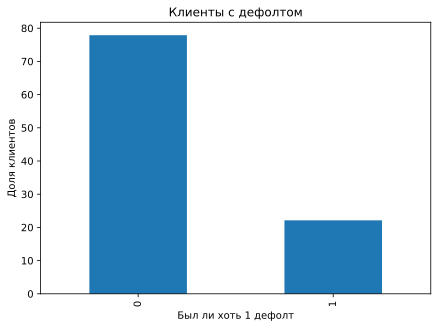

In [10]:
# ПУНКТ 6
qx = (df['default.payment.next.month'].value_counts(normalize=True)*30000)
print(qx)

ax = (df['default.payment.next.month'].value_counts(normalize=True)*100).plot(kind='bar')
ax.set_xlabel("Был ли хоть 1 дефолт")
ax.set_xlabel("Был ли хоть 1 дефолт")
ax.set_ylabel("Доля клиентов")
ax.set_title('Клиенты с дефолтом')

1000000.0

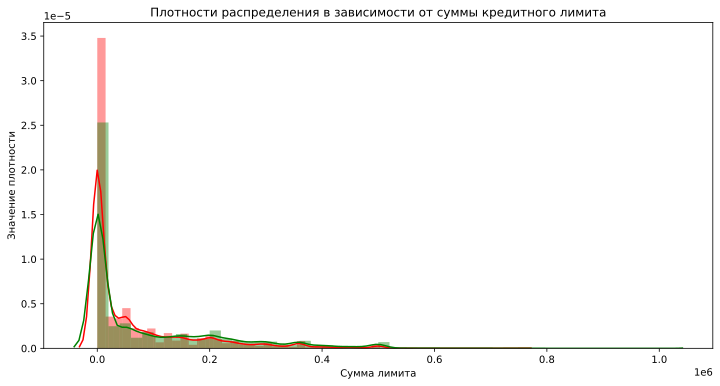

In [34]:
# ПУНКТ 7
deftrue = df.loc[df['default.payment.next.month']==1, ['default.payment.next.month', 'LIMIT_BAL']]
deffalse = df.loc[df['default.payment.next.month']==0, ['default.payment.next.month', 'LIMIT_BAL']]
plt.figure(figsize=(12,6))
sns.distplot(deftrue, kde_kws={'color':'red'},hist_kws={'color':'red'})
sns.distplot(deffalse, kde_kws={'color':'green'},hist_kws={'color':'green'})
plt.xlabel('Сумма лимита')
plt.ylabel('Значение плотности')
plt.title('Плотности распределения в зависимости от суммы кредитного лимита')
df['LIMIT_BAL'].max()

## Ответы на вопросы:
9. По небольшим кредитам - до 100 000 рублей
10. Начиная со 120 000 рублей


In [112]:
#пункт 11
a = deffalse['LIMIT_BAL'].tolist()
b = deftrue['LIMIT_BAL'].tolist()
A = set()
B = set()
for i in a:
    A.add(i)

for i in b:
    B.add(i)

deffalse = B - A
deftrue = A - B
deffalse

{327680.0}

In [207]:
#пункт 13
unique_credits = df['LIMIT_BAL'].unique()
def credits(df, u, deftrue, deffalse):
    clients = {}
    for i in unique_credits:
        sum_deffalse = len(deffalse[deffalse['LIMIT_BAL'] == i])
        sum_deftrue = len(deftrue[deftrue['LIMIT_BAL'] == i])
        number = len(df[df['LIMIT_BAL'] == i])
        if sum_wdef == 0:
            v = 0
        else:
            v = sum_def / sum_wdef
        clients[i] = {'ratio': v, 'num_clients': number}
    return clients

## *4. Друзья друзей (бонусное, 30 баллов) 

1. С помощью VK API скачайте id всех ваших друзей. Убедитесь, что у вас открытый аккаунт, иначе будет ошибка доступа, и ничего скачать не удастся. Если вы не хотите открывать аккаунт, можете выбрать другой (например, аккаунт какой-то известной личности). 
2. Напишите функцию, которая с помощью ```users.get``` и ```friends.get``` по каждому человеку из списка друзей скачивает имя, фамилию, пол, город, дату рождения, образование, количество друзей. Напишите исключение, если у друга закрытый аккаунт, чтобы не включать его в анализ и функция не ломалась. 
3. Постройте график распределения количества друзей по всем друзьям. Создайте переменную ```friends_count_cat```, которая на основе количество друзей принимает значения $1$ - если друзей мало, $2$ - средне, $3$ - много друзей. Определите диапазоны для этих значений на основе графика с распределением. Постройте гистограмму по новой переменной. 
4. Разбейте колонку с образованием на две колонки ```university``` и ```faculty```, в первой сохранив название университета, во второй - название факультета. Удалите исходную колонку с образованием. Сгруппируйте данные по полу и постройте для каждой из групп на одном графике распределения 1) по городам, 2) университету, 3) факультету. Какие наблюдаются различия по этим переменным между девушками и молодыми людьми? 

In [76]:
# мой номер странички
myid = '212521628'  # вставить номер странички

# версия используемого API
version = '5.103' 

# подгружаем токен из файлика на компьютере
with open('/Users/bns/Desktop/VK_TOKEN.txt') as f:
    token = f.read()

In [87]:
import requests
method = 'users.get'
#давайте пропарсим Александра Николаевича Челеховского - великого мага макры
parameters = 'user_ids=2543380'

url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url) 
response.json()

{'response': [{'first_name': 'Александр',
   'id': 2543380,
   'last_name': 'Челеховский',
   'can_access_closed': True,
   'is_closed': False}]}

In [90]:
# Попробуем вытащить список айдишников его друзей
method='friends.get'
url = 'https://api.vk.com/method/' + method + '?' + 'user_id=2543380&count=10000000' + '&v=' + version + '&access_token=' + token
response = requests.get(url) 
idlist = response.json()['response']['items']
len(idlist)

1374

In [188]:
number = 0
import time
parametrs = []
counter = 0
for i in idlist:
    clear_output(wait=True)
    ids = i
    if counter > 1:
        time.sleep(0.5)
        counter = 0
    hhh = 'https://api.vk.com/method/users.get?user_ids=' + str(ids) + '&fields=first_name,second_name,counters,sex,city,bdate,education&v=5.52&'+ 'access_token=' + token
    y = requests.get(hhh)
    parametrs.append(y.json())
    counter += 1
    number += 1
    print('Осталось пропарсить '+str(len(idlist)-number)+' друзей')
parametrs

Осталось пропарсить 0 друзей


[{'response': [{'first_name': 'Дмитрий',
    'id': 1876,
    'last_name': 'Покровский',
    'sex': 2,
    'city': {'id': 2, 'title': 'Санкт-Петербург'},
    'counters': {'albums': 18,
     'audios': 0,
     'followers': 395,
     'friends': 681,
     'notes': 151,
     'online_friends': 56,
     'pages': 54,
     'photos': 1051,
     'subscriptions': 5,
     'videos': 268,
     'mutual_friends': 5,
     'articles': 9,
     'clips_followers': 1076}}]},
 {'response': [{'first_name': 'Лена',
    'id': 6082,
    'last_name': 'Кропотова',
    'sex': 1,
    'bdate': '6.11.1985',
    'city': {'id': 2, 'title': 'Санкт-Петербург'},
    'counters': {'albums': 21,
     'audios': 126,
     'followers': 1586,
     'friends': 557,
     'gifts': 37,
     'notes': 5,
     'online_friends': 34,
     'pages': 52,
     'photos': 1908,
     'subscriptions': 1,
     'videos': 81,
     'mutual_friends': 1,
     'articles': 1,
     'clips_followers': 2143}}]},
 {'response': [{'first_name': 'DELETED',
    'id

In [211]:
count_friends = []
count = 0
count1 = 0
for i in parametrs:
    y = i['response'][0]
    for k in y:
        count1 += 1
        if k == 'counters':
            count_friends.append(y[k]['friends'])
            count += 1
        if count != count1:
            count_friends.append(None)
            count == count1
dfpeople = pd.DataFrame(somepeople)
#dfpeople['friends']=num_of_friends
dfpeople = dfpeople[dfpeople['first_name'] != 'DELETED']
#dfpeople.drop(['counters'] ,axis=1, inplace=True)
dfpeople #к сожалению, вк выдает количество друзей в виде counters - который вроде как словарь, но из него ничего нельзя взять.
#try:
#dfpeople['friends']=dfpeople['counters']['friends']

,first_name,id,last_name,sex,city,counters,bdate,deactivated,university,university_name,faculty,faculty_name,graduation,education_form,education_status
0,Дмитрий,1876,Покровский,2,"{'id': 2, 'title': 'Санкт-Петербург'}","{'albums': 18, 'audios': 0, 'followers': 395, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Лена,6082,Кропотова,1,"{'id': 2, 'title': 'Санкт-Петербург'}","{'albums': 21, 'audios': 126, 'followers': 158...",6.11.1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Никита,9804,Бешта,2,"{'id': 1, 'title': 'Москва'}",NaN,25.8.1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ирина,15296,Трубицына,1,"{'id': 95, 'title': 'Нижний Новгород'}","{'albums': 1, 'audios': 0, 'followers': 2231, ...",22.7.1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Алёна,15636,Мацкевич,1,"{'id': 1, 'title': 'Москва'}",NaN,23.3.1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,Maxim,562226029,Gadzhiagaev,2,NaN,NaN,10.1.1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,Руслан,570462954,Худеев,2,NaN,"{'albums': 0, 'audios': 0, 'followers': 32, 'f...",29.7.1991,NaN,0.0,,0.0,,0.0,NaN,NaN
1371,Анастасия,581546138,Цыганова-Бебенина,1,NaN,"{'albums': 1, 'audios': 0, 'followers': 1, 'fr...",15.5.1986,NaN,0.0,,0.0,,0.0,NaN,NaN
1372,Анна,582439998,Бордюгова,1,NaN,NaN,29.7.2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ниже черновик...

In [104]:
from joblib import Parallel, delayed
from tqdm import tqdm_notebook
from IPython.display import clear_output
nj = -1
a = 0
def vk_download(method, parameters):
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa
bigdata = []
def makebigdata (personid):
    bigdata.extend(vk_download('users.get','user_ids='+str(personid)+'&fields=education'))
for personid in idlist:
    clear_output(wait=True)
    makebigdata(personid)
    a = a+1
    print(a, end='') #нужно для понимания, сколько уже друзей скачано

#method = 'users.get'
#parameters='user_ids=142590816&fields=education'

allpeople=[]
somepeople=[]
wtf = [ ]
for i in range(0,len(parametrs)):
    allpeople.append(parametrs[i]['response'])
for i in range(0,len(allpeople)):
    somepeople.append(allpeople[i][0])

KeyboardInterrupt: 